In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# import la base de donnée

In [2]:
data=pd.read_csv("OnlineR.csv",sep=",")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
16280,537646,84792,ENCHANTED BIRD COATHANGER 5 HOOK,2,07-12-2010 15:39,4.65,17591.0,United Kingdom
16281,537646,22776,SWEETHEART CAKESTAND 3 TIER,1,07-12-2010 15:39,9.95,17591.0,United Kingdom
16282,537646,21212,PACK OF 72 RETROSPOT CAKE CASES,1,07-12-2010 15:39,0.55,17591.0,United Kingdom
16283,537646,22960,JAM MAKING SET WITH JARS,1,07-12-2010 15:39,4.25,17591.0,United Kingdom


In [3]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


# Afficher la taille de la base de donnée

In [4]:
data.shape

(16285, 8)

# Afficher les type de la base de donnée

In [5]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16285 entries, 0 to 16284
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    16285 non-null  object 
 1   StockCode    16285 non-null  object 
 2   Description  16225 non-null  object 
 3   Quantity     16285 non-null  int64  
 4   InvoiceDate  16285 non-null  object 
 5   UnitPrice    16285 non-null  float64
 6   CustomerID   10820 non-null  float64
 7   Country      16285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1017.9+ KB


In [7]:
# Traitement sur les valeurs manquantes
print(data.isnull().sum())
df_null = round(100*(data.isnull().sum())/len(data), 2)
print('les valeurs manquantes en % :')
print(df_null)
data=data.drop(['Description','CustomerID'],axis=1)
data

InvoiceNo         0
StockCode         0
Description      60
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     5465
Country           0
dtype: int64
les valeurs manquantes en % :
InvoiceNo       0.00
StockCode       0.00
Description     0.37
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     33.56
Country         0.00
dtype: float64


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,71053,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,84406B,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,84029G,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,84029E,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...
16280,537646,84792,2,07-12-2010 15:39,4.65,United Kingdom
16281,537646,22776,1,07-12-2010 15:39,9.95,United Kingdom
16282,537646,21212,1,07-12-2010 15:39,0.55,United Kingdom
16283,537646,22960,1,07-12-2010 15:39,4.25,United Kingdom


In [8]:
data.describe()

,Quantity,UnitPrice
count,16285.000000,16285.000000
mean,7.181394,6.874721
std,82.525683,184.714331
min,-9360.000000,0.000000
25%,1.000000,1.450000
50%,2.000000,2.510000
75%,6.000000,4.250000
max,2880.000000,13541.330000


In [9]:
data.head(2)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,71053,6,01-12-2010 08:26,3.39,United Kingdom


# Transefer les donnée catégorique de forme numérique

In [10]:
donne_cat=data.drop(['Quantity','UnitPrice'],axis=1)
donne_cat.head(5)

,InvoiceNo,StockCode,InvoiceDate,Country
0,536365,85123A,01-12-2010 08:26,United Kingdom
1,536365,71053,01-12-2010 08:26,United Kingdom
2,536365,84406B,01-12-2010 08:26,United Kingdom
3,536365,84029G,01-12-2010 08:26,United Kingdom
4,536365,84029E,01-12-2010 08:26,United Kingdom


In [11]:
country=[data['Country']]
print(country)
uqcountry=np.unique(country)
print(uqcountry)
tab=[i for i in range(len(uqcountry))]
tab

[0        United Kingdom
1        United Kingdom
2        United Kingdom
3        United Kingdom
4        United Kingdom
              ...      
16280    United Kingdom
16281    United Kingdom
16282    United Kingdom
16283    United Kingdom
16284    United Kingdom
Name: Country, Length: 16285, dtype: object]
['Australia' 'Belgium' 'EIRE' 'France' 'Germany' 'Iceland' 'Italy' 'Japan'
 'Lithuania' 'Netherlands' 'Norway' 'Poland' 'Portugal' 'Spain'
 'Switzerland' 'United Kingdom']


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [12]:
donne_cat['Country']=donne_cat['Country'].replace(['Australia', 'Belgium', 'EIRE', 'France', 'Germany', 'Iceland',
       'Italy', 'Japan', 'Lithuania', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Spain', 'Switzerland', 'United Kingdom'],tab)
donne_cat['Country']

0        15
1        15
2        15
3        15
4        15
         ..
16280    15
16281    15
16282    15
16283    15
16284    15
Name: Country, Length: 16285, dtype: int64

In [13]:
donne_cat

,InvoiceNo,StockCode,InvoiceDate,Country
0,536365,85123A,01-12-2010 08:26,15
1,536365,71053,01-12-2010 08:26,15
2,536365,84406B,01-12-2010 08:26,15
3,536365,84029G,01-12-2010 08:26,15
4,536365,84029E,01-12-2010 08:26,15
...,...,...,...,...
16280,537646,84792,07-12-2010 15:39,15
16281,537646,22776,07-12-2010 15:39,15
16282,537646,21212,07-12-2010 15:39,15
16283,537646,22960,07-12-2010 15:39,15


In [14]:
InvoiceNo=[data['InvoiceNo']]
print(InvoiceNo)
uqInvoiceNo=np.unique(InvoiceNo)
print(uqInvoiceNo)
tab2=[i for i in range(len(uqInvoiceNo))]
tab2

[0        536365
1        536365
2        536365
3        536365
4        536365
          ...  
16280    537646
16281    537646
16282    537646
16283    537646
16284    537646
Name: InvoiceNo, Length: 16285, dtype: object]
['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374' '536375' '536376' '536377' '536378' '536380' '536381'
 '536382' '536384' '536385' '536386' '536387' '536388' '536389' '536390'
 '536392' '536393' '536394' '536395' '536396' '536397' '536398' '536399'
 '536400' '536401' '536402' '536403' '536404' '536405' '536406' '536407'
 '536408' '536409' '536412' '536414' '536415' '536416' '536420' '536423'
 '536425' '536437' '536446' '536460' '536463' '536464' '536466' '536477'
 '536488' '536500' '536502' '536508' '536514' '536520' '536521' '536522'
 '536523' '536524' '536525' '536526' '536527' '536528' '536529' '536530'
 '536531' '536532' '536533' '536534' '536535' '536536' '536537' '536538'
 '536539' '536540' '536541' '536542' '536544' 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [15]:
donne_cat['InvoiceNo']=donne_cat['InvoiceNo'].replace(uqInvoiceNo,tab2)
donne_cat['InvoiceNo']

0          0
1          0
2          0
3          0
4          0
        ... 
16280    665
16281    665
16282    665
16283    665
16284    665
Name: InvoiceNo, Length: 16285, dtype: int64

In [16]:
donne_cat

,InvoiceNo,StockCode,InvoiceDate,Country
0,0,85123A,01-12-2010 08:26,15
1,0,71053,01-12-2010 08:26,15
2,0,84406B,01-12-2010 08:26,15
3,0,84029G,01-12-2010 08:26,15
4,0,84029E,01-12-2010 08:26,15
...,...,...,...,...
16280,665,84792,07-12-2010 15:39,15
16281,665,22776,07-12-2010 15:39,15
16282,665,21212,07-12-2010 15:39,15
16283,665,22960,07-12-2010 15:39,15


In [17]:
StockCode=[data['StockCode']]
print(StockCode)
uqStockCode=np.unique(StockCode)
print(uqStockCode)
tab3=[i for i in range(len(uqStockCode))]
print(tab3)
donne_cat['StockCode']=donne_cat['StockCode'].replace(uqStockCode,tab3)
donne_cat['StockCode']
donne_cat

[0        85123A
1         71053
2        84406B
3        84029G
4        84029E
          ...  
16280     84792
16281     22776
16282     21212
16283     22960
16284     22624
Name: StockCode, Length: 16285, dtype: object]
['10002' '10120' '10123C' ... 'M' 'POST' 'S']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,

,InvoiceNo,StockCode,InvoiceDate,Country
0,0,2073,01-12-2010 08:26,15
1,0,1691,01-12-2010 08:26,15
2,0,1821,01-12-2010 08:26,15
3,0,1791,01-12-2010 08:26,15
4,0,1790,01-12-2010 08:26,15
...,...,...,...,...
16280,665,1907,07-12-2010 15:39,15
16281,665,1381,07-12-2010 15:39,15
16282,665,327,07-12-2010 15:39,15
16283,665,1523,07-12-2010 15:39,15


In [18]:
InvoiceDate=[data['InvoiceDate']]
print(InvoiceDate)
uqInvoiceDate=np.unique(InvoiceDate)
print(uqInvoiceDate)
tab4=[i for i in range(len(uqInvoiceDate))]
print(len(tab4))
donne_cat['InvoiceDate']=donne_cat['InvoiceDate'].replace(uqInvoiceDate,tab4)
donne_cat['InvoiceDate']
donne_cat

[0        01-12-2010 08:26
1        01-12-2010 08:26
2        01-12-2010 08:26
3        01-12-2010 08:26
4        01-12-2010 08:26
               ...       
16280    07-12-2010 15:39
16281    07-12-2010 15:39
16282    07-12-2010 15:39
16283    07-12-2010 15:39
16284    07-12-2010 15:39
Name: InvoiceDate, Length: 16285, dtype: object]
['01-12-2010 08:26' '01-12-2010 08:28' '01-12-2010 08:34'
 '01-12-2010 08:35' '01-12-2010 08:45' '01-12-2010 09:00'
 '01-12-2010 09:01' '01-12-2010 09:02' '01-12-2010 09:09'
 '01-12-2010 09:32' '01-12-2010 09:34' '01-12-2010 09:37'
 '01-12-2010 09:41' '01-12-2010 09:45' '01-12-2010 09:49'
 '01-12-2010 09:53' '01-12-2010 09:56' '01-12-2010 09:57'
 '01-12-2010 09:58' '01-12-2010 09:59' '01-12-2010 10:03'
 '01-12-2010 10:19' '01-12-2010 10:24' '01-12-2010 10:29'
 '01-12-2010 10:37' '01-12-2010 10:39' '01-12-2010 10:47'
 '01-12-2010 10:51' '01-12-2010 10:52' '01-12-2010 10:53'
 '01-12-2010 11:21' '01-12-2010 11:22' '01-12-2010 11:27'
 '01-12-2010 11:29' '01-12

,InvoiceNo,StockCode,InvoiceDate,Country
0,0,2073,0,15
1,0,1691,0,15
2,0,1821,0,15
3,0,1791,0,15
4,0,1790,0,15
...,...,...,...,...
16280,665,1907,639,15
16281,665,1381,639,15
16282,665,327,639,15
16283,665,1523,639,15


In [19]:
donne_cat

,InvoiceNo,StockCode,InvoiceDate,Country
0,0,2073,0,15
1,0,1691,0,15
2,0,1821,0,15
3,0,1791,0,15
4,0,1790,0,15
...,...,...,...,...
16280,665,1907,639,15
16281,665,1381,639,15
16282,665,327,639,15
16283,665,1523,639,15


In [20]:
donne_cat.describe()

,InvoiceNo,StockCode,InvoiceDate,Country
count,16285.000000,16285.000000,16285.000000,16285.000000
mean,374.218176,1098.131716,351.879398,14.510101
std,194.905593,571.679907,185.624808,2.296917
min,0.000000,0.000000,0.000000,0.000000
25%,209.000000,664.000000,188.000000,15.000000
50%,415.000000,1137.000000,387.000000,15.000000
75%,527.000000,1497.000000,495.000000,15.000000
max,740.000000,2305.000000,639.000000,15.000000


array([[<AxesSubplot:title={'center':'InvoiceNo'}>,
        <AxesSubplot:title={'center':'StockCode'}>],
       [<AxesSubplot:title={'center':'InvoiceDate'}>,
        <AxesSubplot:title={'center':'Country'}>]], dtype=object)

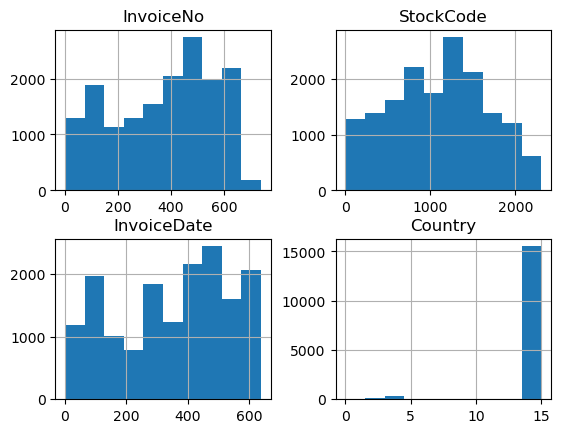

In [21]:
#histogramme 
donne_cat.hist()

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'UnitPrice'}>]], dtype=object)

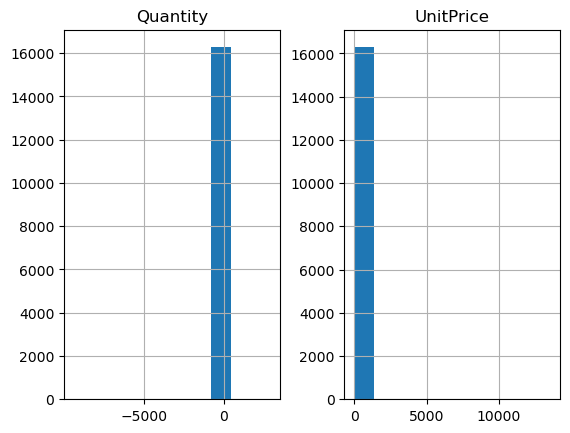

In [22]:
data.hist()

# Corrélations entre les attributs

In [23]:
c1=data.corr(method="pearson")
c1

,Quantity,UnitPrice
Quantity,1.000000,-0.002135
UnitPrice,-0.002135,1.000000


In [24]:
c2=donne_cat.corr(method="pearson")
c2

,InvoiceNo,StockCode,InvoiceDate,Country
InvoiceNo,1.000000,-0.005591,0.980259,-0.010032
StockCode,-0.005591,1.000000,-0.008271,-0.004984
InvoiceDate,0.980259,-0.008271,1.000000,0.000431
Country,-0.010032,-0.004984,0.000431,1.000000


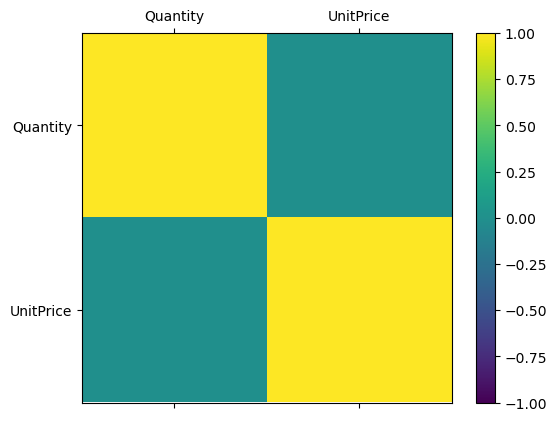

In [25]:
names1=['Quantity','UnitPrice']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(c1, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,2,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names1)
ax.set_yticklabels(names1)
plt.show()

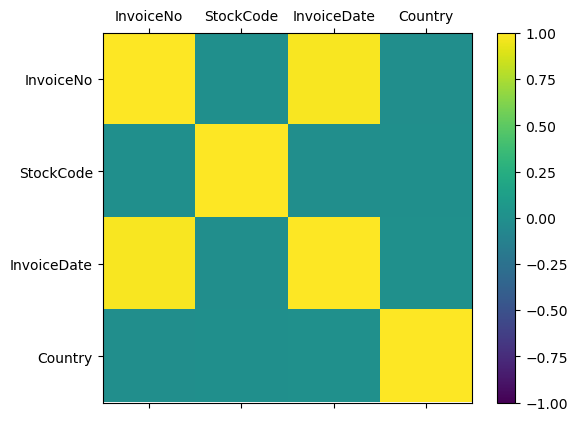

In [26]:
names2=['InvoiceNo','StockCode','InvoiceDate','Country']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(c2, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names2)
ax.set_yticklabels(names2)
plt.show()

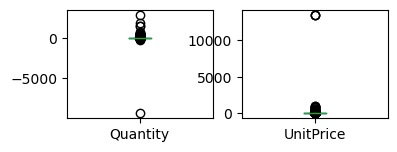

In [27]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

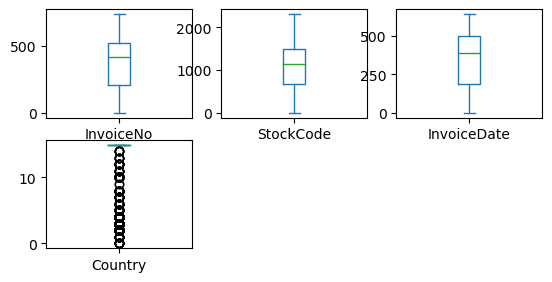

In [28]:
donne_cat.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

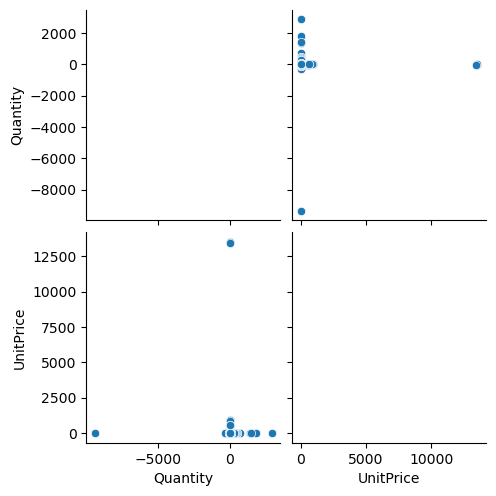

In [17]:
sns.pairplot(data)

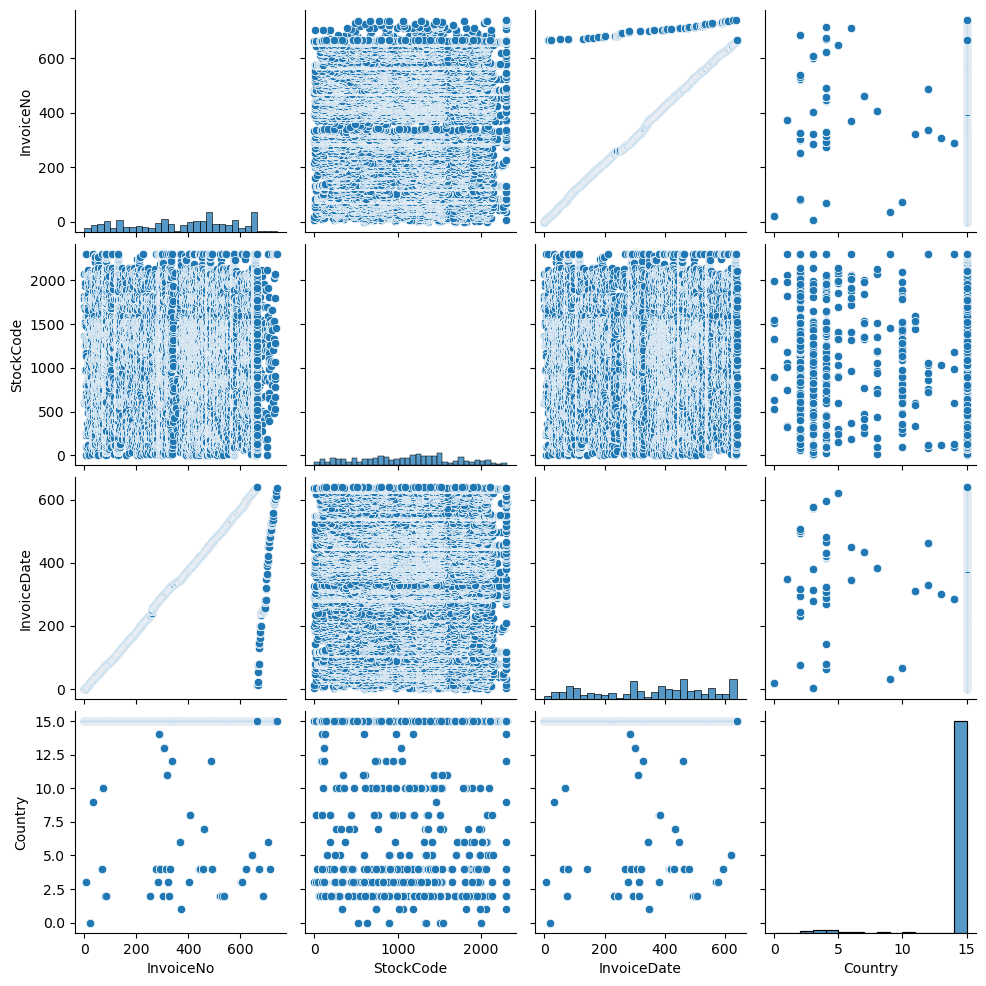

In [21]:
sns.pairplot(donne_cat)

# Pré-traitement des données (Data Pre-processing)
Transformation des données
1- Mise à échélle: Rescale Data
2- Standariser les données: Standardize Data
3- Normaliser le données: Normalize Data

In [29]:
scaler=MinMaxScaler(feature_range=(0,1))
data_scaler=scaler.fit_transform(donne_cat)
data_scaler

array([[0.        , 0.89934924, 0.        , 1.        ],
       [0.        , 0.73362256, 0.        , 1.        ],
       [0.        , 0.79002169, 0.        , 1.        ],
       ...,
       [0.89864865, 0.14186551, 1.        , 1.        ],
       [0.89864865, 0.66073753, 1.        , 1.        ],
       [0.89864865, 0.54143167, 1.        , 1.        ]])

In [30]:
data_df_scaler=pd.DataFrame(data=data_scaler,columns=names2)
data_df_scaler

,InvoiceNo,StockCode,InvoiceDate,Country
0,0.000000,0.899349,0.0,1.0
1,0.000000,0.733623,0.0,1.0
2,0.000000,0.790022,0.0,1.0
3,0.000000,0.777007,0.0,1.0
4,0.000000,0.776573,0.0,1.0
...,...,...,...,...
16280,0.898649,0.827332,1.0,1.0
16281,0.898649,0.599132,1.0,1.0
16282,0.898649,0.141866,1.0,1.0
16283,0.898649,0.660738,1.0,1.0


In [31]:
data_df_scaler.describe()

,InvoiceNo,StockCode,InvoiceDate,Country
count,16285.000000,16285.000000,16285.000000,16285.000000
mean,0.505700,0.476413,0.550672,0.967340
std,0.263386,0.248017,0.290493,0.153128
min,0.000000,0.000000,0.000000,0.000000
25%,0.282432,0.288069,0.294210,1.000000
50%,0.560811,0.493275,0.605634,1.000000
75%,0.712162,0.649458,0.774648,1.000000
max,1.000000,1.000000,1.000000,1.000000


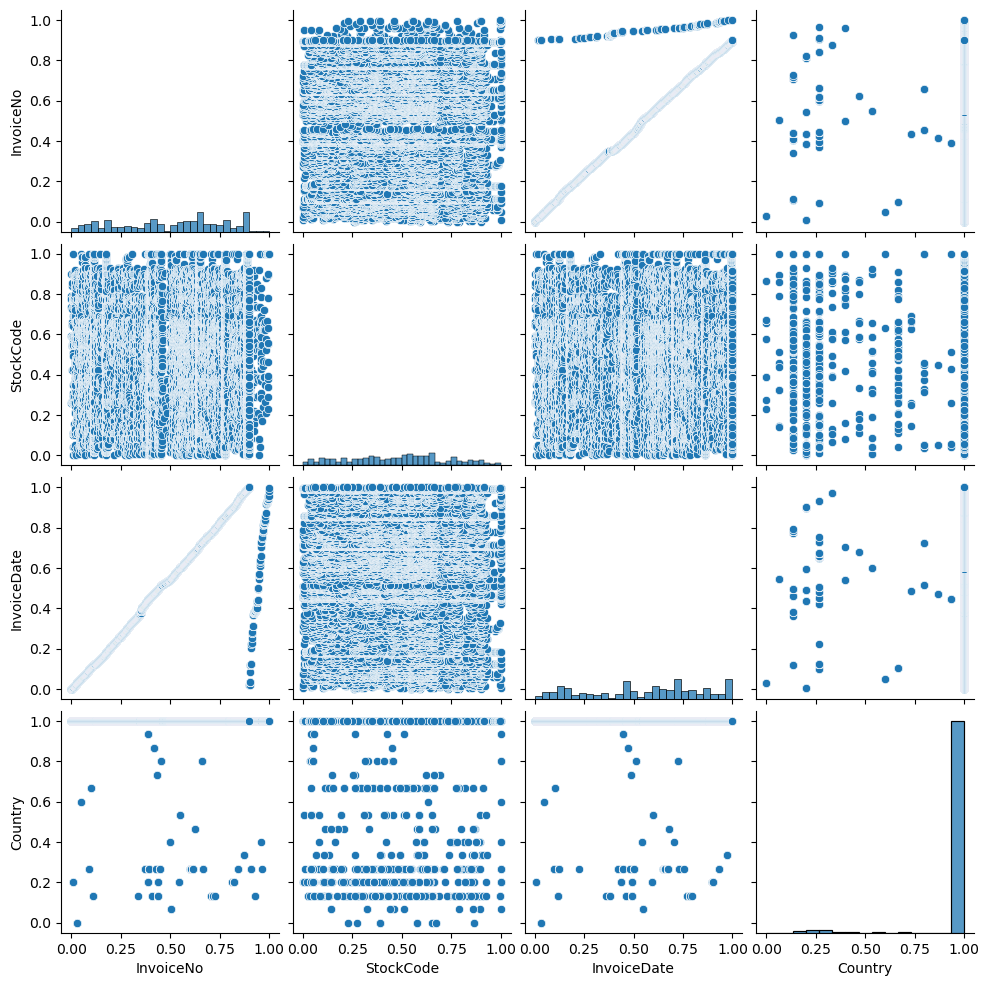

In [32]:
sns.pairplot(data_df_scaler)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Country', ylabel='Density'>

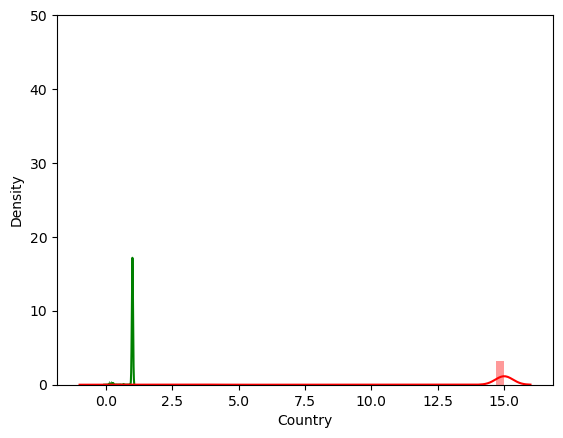

In [33]:
sns.distplot(data_df_scaler['Country'],color='green')
sns.distplot(donne_cat['Country'],color='red')

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(donne_cat)
rescaledX = scaler.transform(donne_cat)
# summarize transformed data
print(rescaledX[0:5,:])

[[-1.92005607  1.70532181 -1.89570675  0.21329186]
 [-1.92005607  1.0370952  -1.89570675  0.21329186]
 [-1.92005607  1.26450216 -1.89570675  0.21329186]
 [-1.92005607  1.21202363 -1.89570675  0.21329186]
 [-1.92005607  1.21027435 -1.89570675  0.21329186]]


In [35]:
data_cat_standard=pd.DataFrame(data=rescaledX,columns=names2)
data_cat_standard.head(5)

,InvoiceNo,StockCode,InvoiceDate,Country
0,-1.920056,1.705322,-1.895707,0.213292
1,-1.920056,1.037095,-1.895707,0.213292
2,-1.920056,1.264502,-1.895707,0.213292
3,-1.920056,1.212024,-1.895707,0.213292
4,-1.920056,1.210274,-1.895707,0.213292


In [36]:
data_cat_standard.shape

(16285, 4)

In [37]:
data_cat_standard.describe()

,InvoiceNo,StockCode,InvoiceDate,Country
count,1.628500e+04,1.628500e+04,1.628500e+04,1.628500e+04
mean,-1.576660e-15,1.130505e-16,-1.706543e-14,4.760249e-15
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.920056e+00,-1.920945e+00,-1.895707e+00,-6.317401e+00
25%,-8.477091e-01,-7.594198e-01,-8.828800e-01,2.132919e-01
50%,2.092453e-01,6.799168e-02,1.892079e-01,2.132919e-01
75%,7.839001e-01,6.977340e-01,7.710445e-01,2.132919e-01
max,1.876770e+00,2.111156e+00,1.546827e+00,2.132919e-01


In [38]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(donne_cat)
normalizedX = scaler.transform(donne_cat)
# summarize transformed data
print(normalizedX[0:5,:])
data_cat_Normalizer=pd.DataFrame(data=normalizedX,columns=names2)
data_cat_Normalizer.head(5)

[[0.         0.99997382 0.         0.0072357 ]
 [0.         0.99996066 0.         0.00887014]
 [0.         0.99996608 0.         0.00823695]
 [0.         0.99996493 0.         0.00837492]
 [0.         0.99996489 0.         0.00837959]]


,InvoiceNo,StockCode,InvoiceDate,Country
0,0.0,0.999974,0.0,0.007236
1,0.0,0.999961,0.0,0.008870
2,0.0,0.999966,0.0,0.008237
3,0.0,0.999965,0.0,0.008375
4,0.0,0.999965,0.0,0.008380


In [39]:
data_cat_Normalizer.describe()

,InvoiceNo,StockCode,InvoiceDate,Country
count,16285.000000,16285.000000,16285.000000,16285.000000
mean,0.333215,0.819050,0.313165,0.014918
std,0.194754,0.217649,0.185239,0.014947
min,0.000000,0.000000,0.000000,0.000000
25%,0.183739,0.766495,0.170329,0.008920
50%,0.314308,0.901396,0.294987,0.011507
75%,0.467880,0.967584,0.440404,0.016401
max,0.958941,0.999995,0.701804,0.588348


# Réduction de dimension

In [40]:
pca_cat=PCA(n_components=4)
fit_cat= pca_cat.fit(donne_cat)
# summarize components
print("Explained Variance: %s" % fit_cat.explained_variance_ratio_)
print(fit_cat.components_)
pca_samples= pca_cat.transform(donne_cat)
pca_samples

Explained Variance: [8.18554106e-01 1.79646347e-01 1.78637128e-03 1.31762900e-05]
[[-2.56370052e-03  9.99991226e-01 -3.31285149e-03 -1.99917053e-05]
 [-7.24477240e-01 -4.14088122e-03 -6.89286283e-01  4.39755154e-05]
 [ 6.89286659e-01 -6.33047223e-04 -7.24474122e-01 -4.55491967e-03]
 [-3.17148627e-03 -1.72903274e-05  3.26970986e-03 -9.99989625e-01]]


array([[ 9.76984828e+02,  5.09621402e+02, -3.63544746e+00,
        -4.70465119e-01],
       [ 5.94988180e+02,  5.11203218e+02, -3.39362342e+00,
        -4.63860213e-01],
       [ 7.24987039e+02,  5.10664904e+02, -3.47591956e+00,
        -4.66107956e-01],
       ...,
       [-7.72821626e+02, -4.05379919e+02, -7.09348275e+00,
        -4.59969977e-01],
       [ 4.23167881e+02, -4.10332413e+02, -7.85060723e+00,
        -4.80649208e-01],
       [ 1.48170294e+02, -4.09193671e+02, -7.67651924e+00,
        -4.75894368e-01]])

In [41]:
pdc= pd.DataFrame(pca_samples,columns=names2)
pdc.head()

,InvoiceNo,StockCode,InvoiceDate,Country
0,976.984828,509.621402,-3.635447,-0.470465
1,594.988180,511.203218,-3.393623,-0.463860
2,724.987039,510.664904,-3.475920,-0.466108
3,694.987302,510.789130,-3.456928,-0.465589
4,693.987311,510.793271,-3.456295,-0.465572


# kMeans

In [22]:
x=donne_cat.iloc[:,:-1].values
y=donne_cat.iloc[:,-1].values

In [22]:
km = KMeans(n_clusters=5, n_init=1, init='k-means++').fit(x)
predLabels = km.predict(x)
print(predLabels)

[3 2 2 ... 1 0 0]


# utiliser la méthode ELBOW pour afficher le nombre de cluster optimale

In [31]:
print(metrics.adjusted_rand_score(predLabels, y))
print(km.inertia_)
print(metrics.silhouette_score(donne_cat, predLabels))
print(metrics.davies_bouldin_score(donne_cat, predLabels))

-0.00142281730555757
285993674.3624835
0.37053728161094424
0.9660740080562977


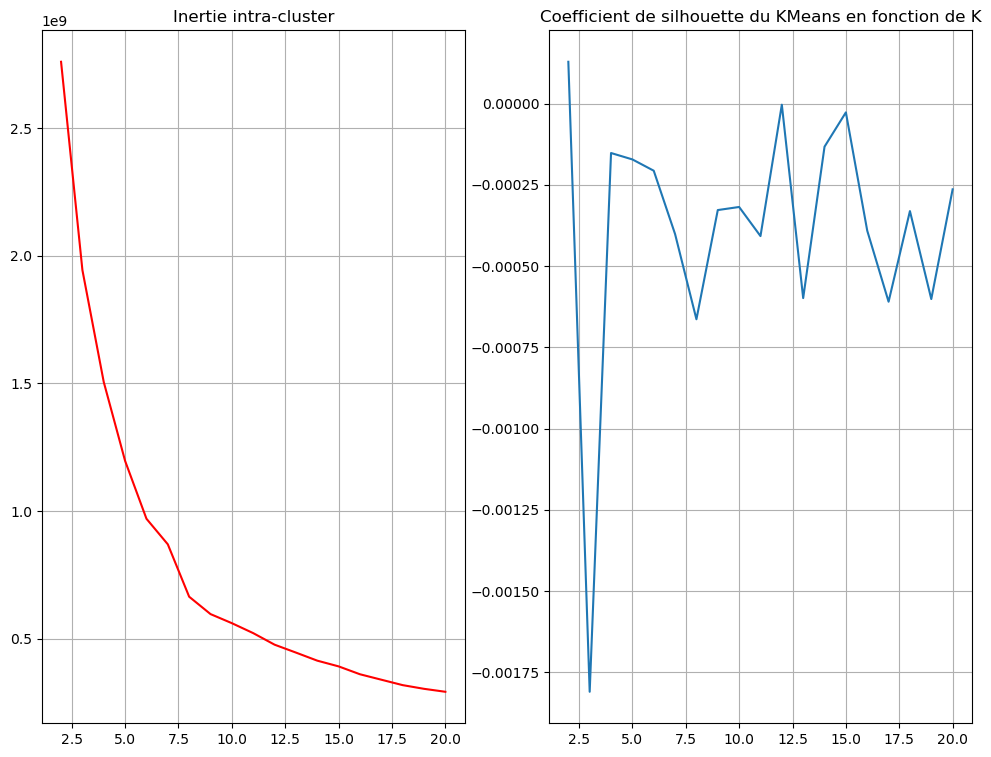

In [53]:
inertie, silhouettes=[], []
for k in range(2,21):
    km= KMeans(n_clusters = k, n_init= 1, init='k-means++').fit(x)
inertie.append(km.inertia_)
silhouettes.append(metrics.adjusted_rand_score(km.labels_, y))
fig= plt.figure(figsize = (12,9))
ax=fig.add_subplot(121)
ax.plot(range(2,21), inertie, c='r')
ax.grid(True)
plt.title("Inertie intra-cluster")
ay=fig.add_subplot(122)
ay.plot(range(2,21), silhouettes)
ay.grid(True)
plt.title("Coefficient de silhouette du KMeans en fonction de K")
plt.show()


In [56]:
k_values = range(2,21)
best_silhouette = np.max(silhouettes)
print("Coefficient de silhouette optimal : %.2f" % best_silhouette)
best_K = k_values[silhouettes.index(best_silhouette)]
print("K correspondant : %.2f" % best_K)

Coefficient de silhouette optimal : 0.00
K correspondant : 16.00


# DBSCAN (Clustering par densité)

In [58]:
from sklearn import cluster

# initialisation d'un clustering DBSCAN
dbscan = cluster.DBSCAN(eps=0.1, min_samples=2)
# application aux données
dbscan.fit(x)

DBSCAN(eps=0.1, min_samples=2)

In [59]:
np.unique(dbscan.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

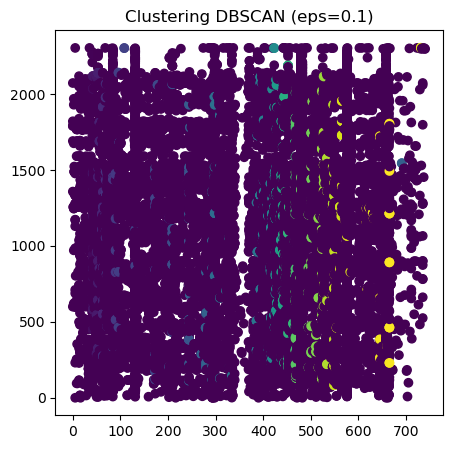

In [60]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c=dbscan.labels_)
plt.title("Clustering DBSCAN (eps=0.1)")
plt.show()

In [61]:
# initialisation d'un clustering DBSCAN
dbscan_005 = cluster.DBSCAN(eps=0.05, min_samples=2)
# application aux données
dbscan_005.fit(x)

DBSCAN(eps=0.05, min_samples=2)

In [62]:
np.unique(dbscan_005.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

Text(0.5, 1.0, 'Clustering DBSCAN (eps=0.05)')

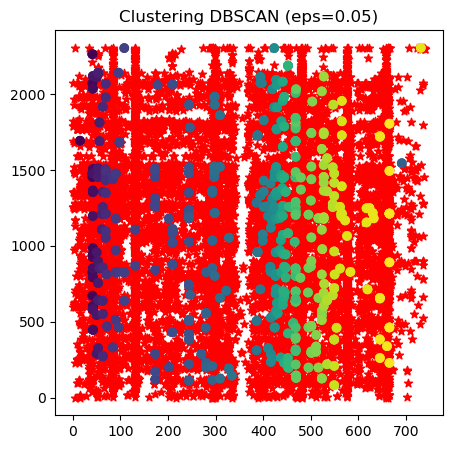

In [64]:
fig = plt.figure(figsize=(5, 5))
outliers = np.where(dbscan_005.labels_ == -1)[0]
plt.scatter(x[outliers, 0], x[outliers, 1], marker='*', color='red')
non_outliers = np.where(dbscan_005.labels_ != -1)[0]
plt.scatter(x[non_outliers, 0], x[non_outliers, 1], c=dbscan_005.labels_[non_outliers])
plt.title("Clustering DBSCAN (eps=0.05)")

In [65]:
# initialisation d'un clustering DBSCAN
dbscan_2 = cluster.DBSCAN(eps=2., min_samples=2)
# application aux données
dbscan_2.fit(x)

DBSCAN(eps=2.0, min_samples=2)

In [66]:
np.unique(dbscan_2.labels_)

array([  -1,    0,    1, ..., 3294, 3295, 3296], dtype=int64)

Text(0.5, 1.0, 'Clustering DBSCAN (eps=2.)')

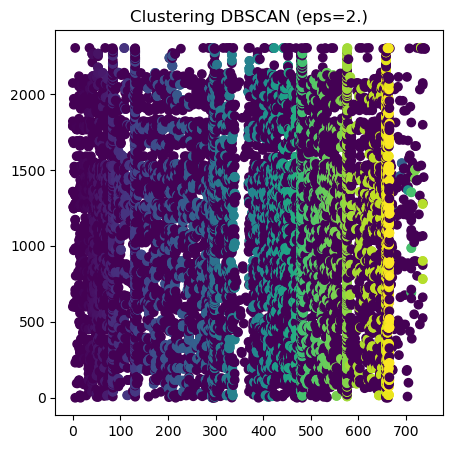

In [67]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c=dbscan_2.labels_)
plt.title("Clustering DBSCAN (eps=2.)")

In [68]:
print("Coefficient de silhouette pour DBSCAN (eps=0.2) : %.2f" % metrics.silhouette_score(x, dbscan.labels_))

Coefficient de silhouette pour DBSCAN (eps=0.2) : -0.83


In [74]:
print("Index de Rand ajusté du K-means (K=2) : %.2f" % metrics.adjusted_rand_score(y, km.labels_))

Index de Rand ajusté du K-means (K=2) : 0.00


In [75]:
print("Index de Rand ajusté de dbscan (eps=0.2) : %.2f" % metrics.adjusted_rand_score(y, dbscan.labels_))

Index de Rand ajusté de dbscan (eps=0.2) : -0.05


# CHA

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
hc_complete = linkage(x, method="complete", metric='euclidean')
hc_average = linkage(x, method="average", metric='euclidean')
hc_single = linkage(x, method="single", metric='euclidean')
# calculate full dendrogram
dendrogram(hc_complete)
plt.show()

In [28]:
print(cut_tree(hc_complete, n_clusters = 2).T) 

[[0 0 0 ... 1 0 1]]


In [29]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage="ward",
 distance_threshold = 6,
 n_clusters=None
 )
model.fit(x)

AgglomerativeClustering(distance_threshold=6, n_clusters=None)

# Dendrogram

In [41]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
            else:
                current_count += counts[child_idx-n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

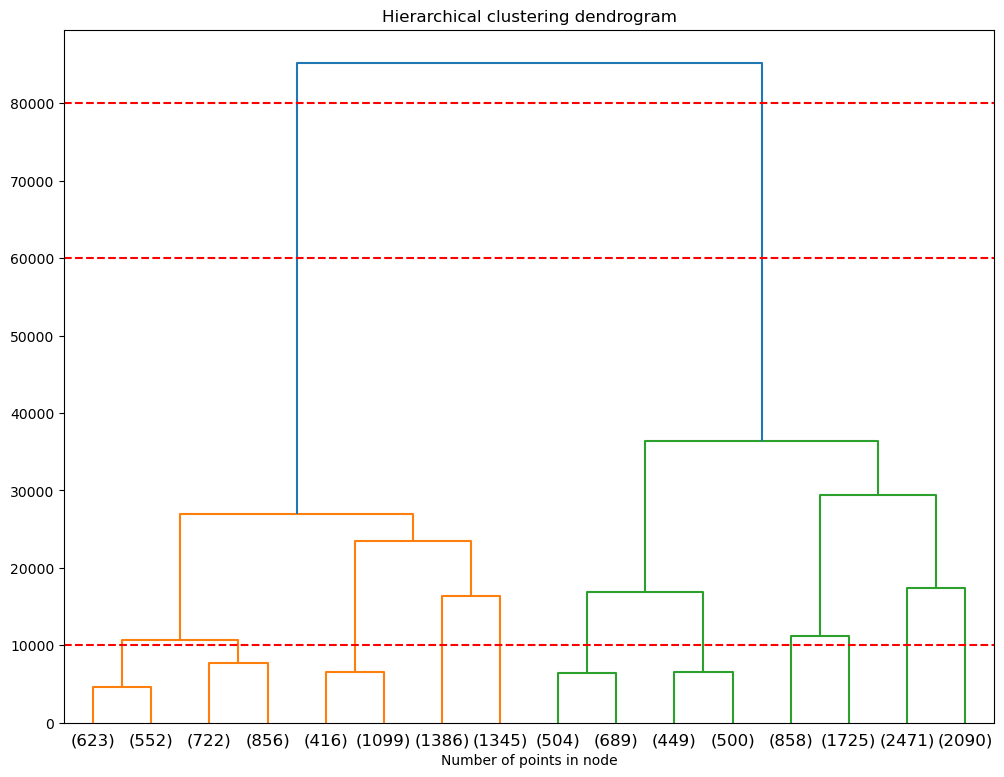

In [50]:
fig, ax = plt.subplots(figsize = (12,9))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 10000, color = "r", linestyle = "--")
plt.axhline(y = 60000 , color = "r", linestyle = "--")
plt.axhline(y = 80000, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()

In [35]:
model.labels_

array([4789, 4493, 4788, ..., 7320,  968,  654], dtype=int64)

# Conclusion

Nous visons à segmenter les clients afin que l'entreprise puisse cibler efficacement ses clients. pour cela j'applique les méthodes d’apprentissage non supervisé aux données.le nombre de
de clusters adapté à ce jeu de données à l'aide du K-means est k=16 et DBSCAN  k=
